In [20]:
## imports 
# camera
import io
from picamera import PiCamera
import time
# images
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# edge-tpu
from embedding import kNNEmbeddingEngine

## parameter configuration
model_path = "test_data/mobilenet_v2_1.0_224_quant_edgetpu.tflite"
width = 224
height = 224

kNN = 3
engine = kNNEmbeddingEngine(model_path, kNN)

Object: nutella
Photo will be taken in 5 seconds!
Photo was taken!
Object: baseball
Photo will be taken in 5 seconds!
Photo was taken!
Object: sd-card
Photo will be taken in 5 seconds!
Photo was taken!
Object: box
Photo will be taken in 5 seconds!
Photo was taken!


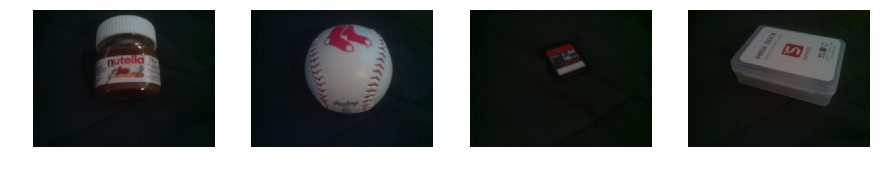

In [27]:
## learning
fig=plt.figure(figsize=(15, 15))

labels = ["nutella", "baseball", "sd-card", "box"]
columns = len(labels)
rows = 1

count = 1
for label in labels:
    # take photo
    stream = io.BytesIO()
    print("Object: " + label)
    print("Photo will be taken in 5 seconds!")
    time.sleep(5)
    with PiCamera() as camera:
        camera.resolution = (640, 480)
        camera.capture(stream, format='jpeg')
    stream.seek(0)
    print("Photo was taken!")

    # convert image to PIL
    image = Image.open(stream)
    
    fig.add_subplot(rows, columns, count)
    plt.imshow(np.asarray(image))
    plt.axis('off')
    
    # learning engine
    emb = engine.DetectWithImage(image)
    engine.addEmbedding(emb, label) 
    count += 1


baseball


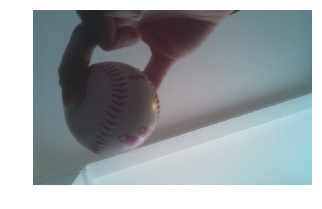

In [29]:
fig=plt.figure(figsize=(5, 5))
## classify
# take a photo
stream = io.BytesIO()
with PiCamera() as camera:
    camera.capture(stream, format='jpeg')
stream.seek(0)

# convert image to PIL
image_test = Image.open(stream)
plt.imshow(np.asarray(image_test))
plt.axis('off')
# classify the image
emb_test = engine.DetectWithImage(image_test)
print(engine.kNNEmbedding(emb_test))

nutella


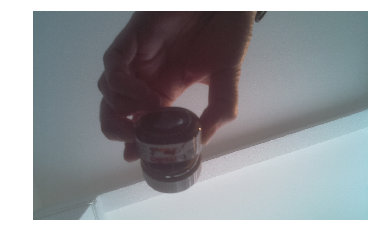

In [31]:
## classify
# take a photo
stream = io.BytesIO()
with PiCamera() as camera:
    camera.capture(stream, format='jpeg')
stream.seek(0)

# convert image to PIL
image_test = Image.open(stream)
plt.imshow(np.asarray(image_test))
plt.axis('off')
# classify the image
emb_test = engine.DetectWithImage(image_test)
print(engine.kNNEmbedding(emb_test))

In [26]:
engine.clear()